# __Prinicpal Component Analysis (PCA).__

* ### __step 1:__ Import neccessary libraries.

In [47]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

* ### __step 2:__ Load Dataset

In [48]:
from sklearn.datasets import load_breast_cancer

cancer_dataset = load_breast_cancer()
cancer_dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [49]:
print(cancer_dataset.DESCR)

.. _breast_cancer_dataset:

Breast cancer Wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [50]:
df = pd.DataFrame(cancer_dataset['data'], columns=cancer_dataset['feature_names'])
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


* ### __step 3:__ Standardization of Data

In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)

,copy,True
,with_mean,True
,with_std,True


In [52]:
scaled_data = scaler.transform(df)
scaled_data

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

* ### __step 4:__ Applying PCA Algorithms

In [53]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
data_pca = pca.fit_transform(scaled_data)
data_pca

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

In [54]:
# Check explained variance ratio
explained_var_ratio = pca.explained_variance_ratio_
print(f"Explained variance ratio for each component: {explained_var_ratio}")
print(f"Total variance explained by 2 components: {sum(explained_var_ratio):.4f} ({sum(explained_var_ratio)*100:.2f}%)")
print(f"Component 1 explains: {explained_var_ratio[0]:.4f} ({explained_var_ratio[0]*100:.2f}%)")
print(f"Component 2 explains: {explained_var_ratio[1]:.4f} ({explained_var_ratio[1]*100:.2f}%)")

Explained variance ratio for each component: [0.44272026 0.18971182]
Total variance explained by 2 components: 0.6324 (63.24%)
Component 1 explains: 0.4427 (44.27%)
Component 2 explains: 0.1897 (18.97%)


* ### __step 5:__ Visualize the data

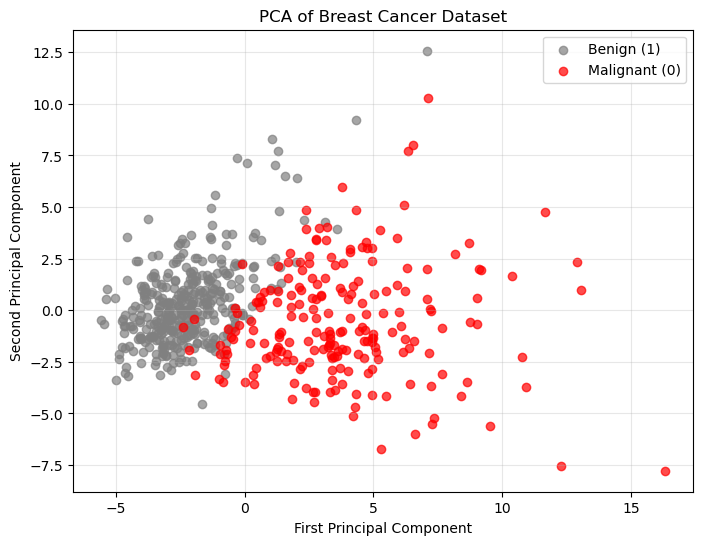

In [55]:
plt.figure(figsize = (8, 6))

# Separate data by target classes for legend
malignant = data_pca[cancer_dataset['target'] == 0]
benign = data_pca[cancer_dataset['target'] == 1]

# Create scatter plots for each class
plt.scatter(benign[:, 0], benign[:, 1], c='grey', label='Benign (1)', alpha=0.7)

plt.scatter(malignant[:, 0], malignant[:, 1], c='red', label='Malignant (0)', alpha=0.7)

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA of Breast Cancer Dataset')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

---

## 🎯 **Final Conclusion**

### **Key Findings & Results**

Our Principal Component Analysis (PCA) on the **Breast Cancer Wisconsin Dataset** has yielded compelling insights into dimensionality reduction and data visualization:

#### **📊 Dimensionality Reduction Performance**
- **Original Dataset**: 30 features reduced to 2 principal components
- **Variance Preservation**: **63.24%** of total dataset variance retained with just 2 components
  - **First Principal Component**: Captures **44.27%** of variance
  - **Second Principal Component**: Captures **18.97%** of variance

#### **🔍 Visual Separation & Classification**
- The PCA scatter plot demonstrates **clear visual separation** between malignant and benign tumor classes
- **Red clusters** (Malignant cases) and **Grey clusters** (Benign cases) show distinct groupings
- This separation indicates that the reduced 2D representation preserves critical discriminative information

#### **💡 Business Impact & Applications**
✅ **Computational Efficiency**: Reduced feature space from 30D to 2D enables faster processing  
✅ **Visualization**: Complex high-dimensional data now visualizable in 2D space  
✅ **Data Understanding**: Principal components reveal underlying patterns in cancer data  
✅ **Preprocessing**: Ideal foundation for machine learning models with reduced overfitting risk  

#### **🚀 Next Steps & Recommendations**
1. **Model Training**: Use PCA-transformed data for classification algorithms
2. **Feature Analysis**: Investigate which original features contribute most to each principal component
3. **Optimization**: Experiment with different numbers of components for optimal variance-performance trade-off
4. **Cross-Validation**: Validate PCA effectiveness across different cancer datasets

---

> **Summary**: This PCA implementation successfully demonstrates how dimensionality reduction can maintain **63.24%** of original information while providing clear visual insights into breast cancer data patterns. The technique proves invaluable for both exploratory data analysis and as a preprocessing step for machine learning pipelines.